In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pathlib
import sys
from os.path import join
path_to_file = str(pathlib.Path().resolve())
dir_path = join(path_to_file, "../../")
sys.path.append(join(dir_path, "HelperFiles"))
import helper

results_path = join(dir_path, "Experiments", "Results", "Top_K", "rank", "alpha_0.2")

## NOT WORTH IT. NEVER OBSERVE SS FWER OVER ALPHA.
didn't let k=5 run for all 30 bc it's somehow more conservative (?) and always had SS FWER of 0

In [8]:
# K = 2
# K = 5 is all 0 FWER :|
with open(join(results_path, "rankshap_vs_ss_k2"), "rb") as fp:
    results2 = pickle.load(fp)
results2.keys()

with open(join(results_path, "rankshap_vs_ss_k5"), "rb") as fp:
    results5 = pickle.load(fp)
results5.keys()

dict_keys(['rankshap', 'ss_fixed', 'ss_adaptive', 'rankshap_n_samples', 'x_indices'])

In [9]:
def get_fwers_all_pts(all_top_Ks):
    return np.array([helper.calc_fwer(top_Ks_pt) for top_Ks_pt in all_top_Ks])

rankshap_fwers2 = get_fwers_all_pts(results2['rankshap'])
# ss_fixed_fwers2 = get_fwers_all_pts(results2['ss_fixed'])
ss_adaptive_fwers2 = get_fwers_all_pts(results2['ss_adaptive'])
rankshap_fwers5 = get_fwers_all_pts(results5['rankshap'])
# ss_fixed_fwers5 = get_fwers_all_pts(results5['ss_fixed'])
ss_adaptive_fwers5 = get_fwers_all_pts(results5['ss_adaptive'])

rankshap_fwers = np.array([rankshap_fwers2, rankshap_fwers5])*100
# ss_fixed_fwers = np.array([ss_fixed_fwers2, ss_fixed_fwers5])*100
ss_adaptive_fwers = np.array([ss_adaptive_fwers2, ss_adaptive_fwers5])*100

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

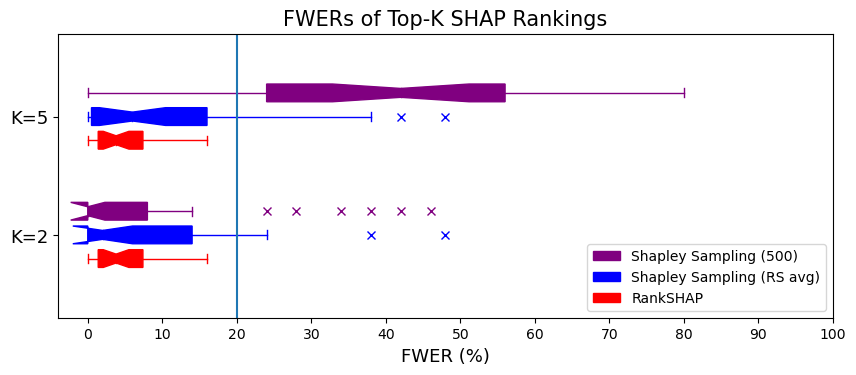

In [ ]:
offset = 0.2
plt.figure(figsize=(10,4))

c = "purple"
plt.boxplot(rankshap_fwers.T, positions=[1+offset, 2+offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )
# c = "blue"
# plt.boxplot(ss_fixed_fwers.T, positions=[1, 2], notch=True, patch_artist=True,
#             boxprops=dict(facecolor=c, color=c),
#             capprops=dict(color=c),
#             whiskerprops=dict(color=c),
#             flierprops=dict(color=c, markeredgecolor=c, marker='x'),
#             medianprops=dict(color=c), 
#             vert=False
#             )
c = "red"
plt.boxplot(ss_adaptive_fwers.T, positions=[1-offset,2-offset], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c, marker='x'),
            medianprops=dict(color=c), 
            vert=False
            )

import matplotlib.patches as mpatches
colors = ["purple", "blue", "red"]
cols = ["Shapley Sampling (500)", "Shapley Sampling (RS avg)", "RankSHAP"]
patches = []
for i in range(2):
    patches.append(mpatches.Patch(color=colors[i], label=cols[i]))
plt.legend(handles=patches)

plt.yticks([1,2], ["K=2", "K=5"], size=13)
plt.xticks(np.linspace(0, 100, 11))
plt.axvline(20)
plt.xlabel("FWER (%)", size=13)
plt.subplots_adjust(bottom=0.17)
plt.title("FWERs of Top-K SHAP Rankings", size=15)
# plt.savefig(join(dir_path, "Experiments", "Figures", "shap_boxplots.png"), bbox_inches="tight")
plt.show()
